In [70]:
#Import the necessary libraries
#For iterative solutions tqdm shows a progress tracker.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import seaborn as sb
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [79]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration, removeIndex = []):
      
      self.learningRate = learningRate
      self.tolerance = tolerance
      self.maxIteration = maxIteration
      self.removeIndex=removeIndex
      self.X_train, self.X_test, self.y_train, self.y_test = self.readDataset()
  
    #Reading the dataset and splitting it into train and test data
    def readDataset(self):
      train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
      test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')

      train_df = self.remove_index(train_df)       

      train_df,test_df=train_df.values,test_df.values
      X_train, y_train = train_df[:,1:], train_df[:,0]
      X_test, y_test = test_df[:,1:], test_df[:,0]

      return X_train,X_test, y_train,y_test

    #added remove_index function
    def remove_index(self, train_df):     
      if len(self.removeIndex) > 0:
        index = np.array(self.removeIndex) - 1
        train_df = train_df.drop(index)
      return train_df 

    #added bias column 
    def add_X0(self,X):
      return np.column_stack([np.ones([X.shape[0],1]),X])

    #calculating sigmoid
    def sigmoid(self, z):
      sig = 1/(1+np.exp(-z))
      return sig   

    def costFunction(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      #loss = y*np.log(sig)+(1-y)*np.log(1-sig)
      loss = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
      cost = -loss.sum()
      return cost 

    def gradient(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      gradient = (sig-y).dot(X)
      return gradient

    # Using the formula for Gradient descent

    def gradDescent(self, X, y):
      losses = []
      prev_loss = float('inf')

      for i in tqdm(range(self.maxIteration)):
        self.w = self.w - (self.learningRate * self.gradient(X, y))
        current_loss = self.costFunction(X, y)
        diff_loss = np.abs(prev_loss - current_loss)
        losses.append(current_loss)

        if diff_loss < self.tolerance:
          print ("The model stopped learninig")
          break
      
        prev_loss = current_loss

    def predict(self, X):
      sig = self.sigmoid(X.dot(self.w))
      return np.around(sig)

    def evaluateFunction(self, y, y_hat):
      y = (y == 1)
      y_hat = (y_hat == 1)
      precision = (y & y_hat).sum() / y_hat.sum()
      recall = (y & y_hat).sum() / y.sum()
      f_score = 2 * (precision * recall) / (precision + recall)
      
      return recall, precision, f_score

    def fit(self):
      self.X_train, self.X_test, self.y_train, self.y_test = self.readDataset()
      self.w = np.ones(self.X_train.shape[1], dtype = np.float64)

      print("Solving using Gradient Descent")
      self.gradDescent(self.X_train, self.y_train)
      print("Evaluate results")
      y_hat_train = self.predict(self.X_train)

      recall, precision, f_score = self.evaluateFunction(self.y_train, y_hat_train)
      print("Recall of model was {}".format(recall))
      print("Precision of model was {}".format(precision))
      print("Fq score of model was {}".format(f_score))

      self.plot()
      self.scatterPlt()
      self.plot3D() 
    
 #plotting functions provided by Professor
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')
        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                    self.sigmoid(self.X_train.dot(self.w)), 
                    c = self.y_train[:], cmap='viridis', s=100);
        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                            np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        f, ax = plt.subplots(figsize=(14,12))
        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                  c=self.y_train[:], s=50,
                  cmap="RdBu", vmin=-.2, vmax=1.2,
                  edgecolor="white", linewidth=1)
        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                            np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                  c=self.y_train[:], s=50,
                  cmap="RdBu", vmin=-.2, vmax=1.2,
                  edgecolor="white", linewidth=1)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()  


Without remove_index

In [99]:
lr = LogisticRegression(learningRate = 0.0001, maxIteration = 50000, tolerance = 0.0005)

Solving using Gradient Descent


  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-79-d16229ddb704>:42: RuntimeWarning: invalid value encountered in log
  loss = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
100%|██████████| 50000/50000 [00:02<00:00, 20862.31it/s]


Evaluate results
Recall of model was 0.9722222222222222
Precision of model was 0.9210526315789473
Fq score of model was 0.9459459459459458


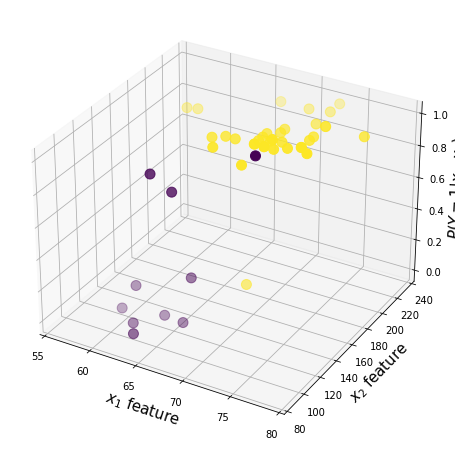

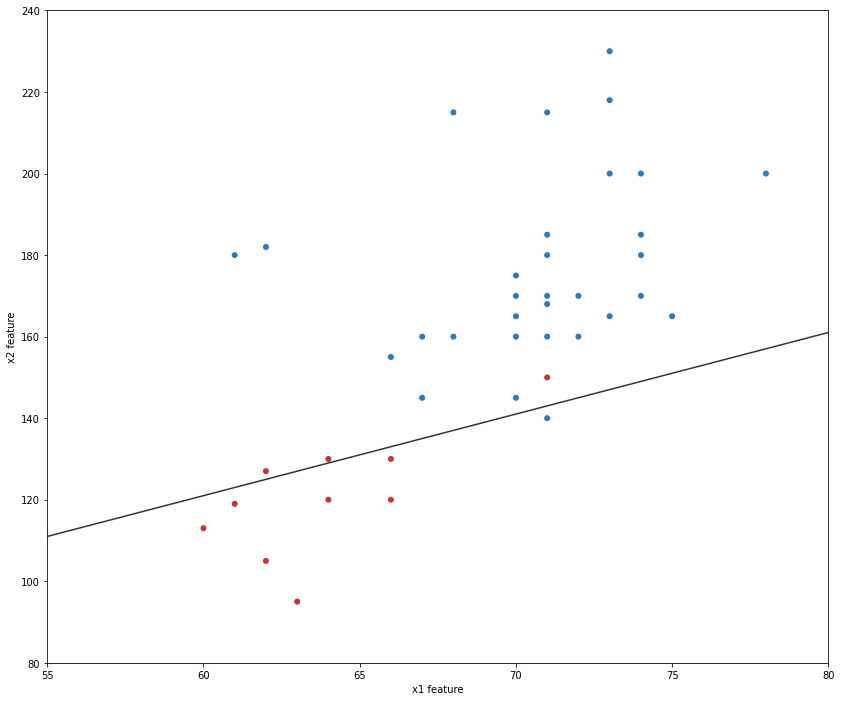

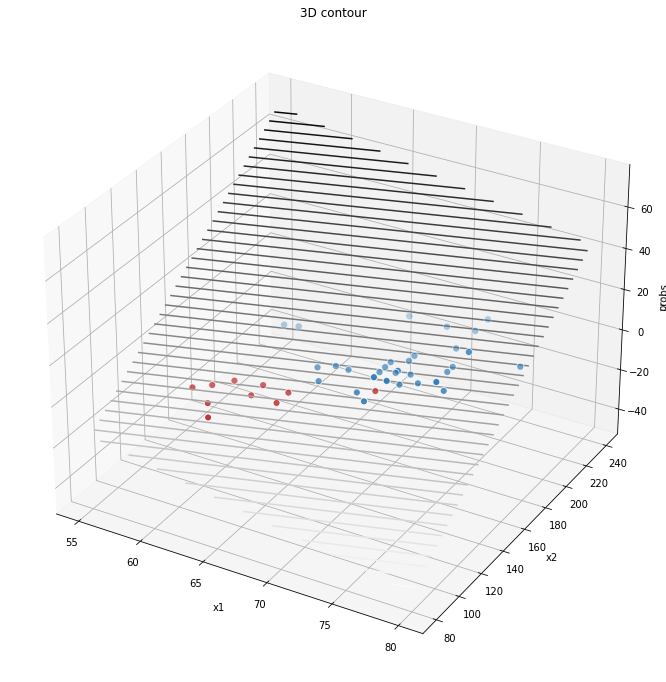

In [100]:
lr.fit()

Using remove_index

Solving using Gradient Descent


  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-79-d16229ddb704>:42: RuntimeWarning: invalid value encountered in log
  loss = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
100%|██████████| 50000/50000 [00:03<00:00, 12646.39it/s]


Evaluate results
Recall of model was 1.0
Precision of model was 1.0
Fq score of model was 1.0


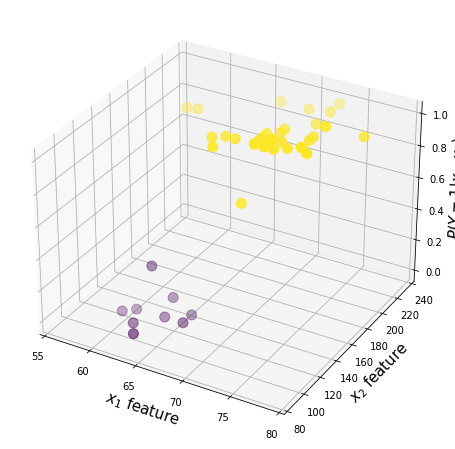

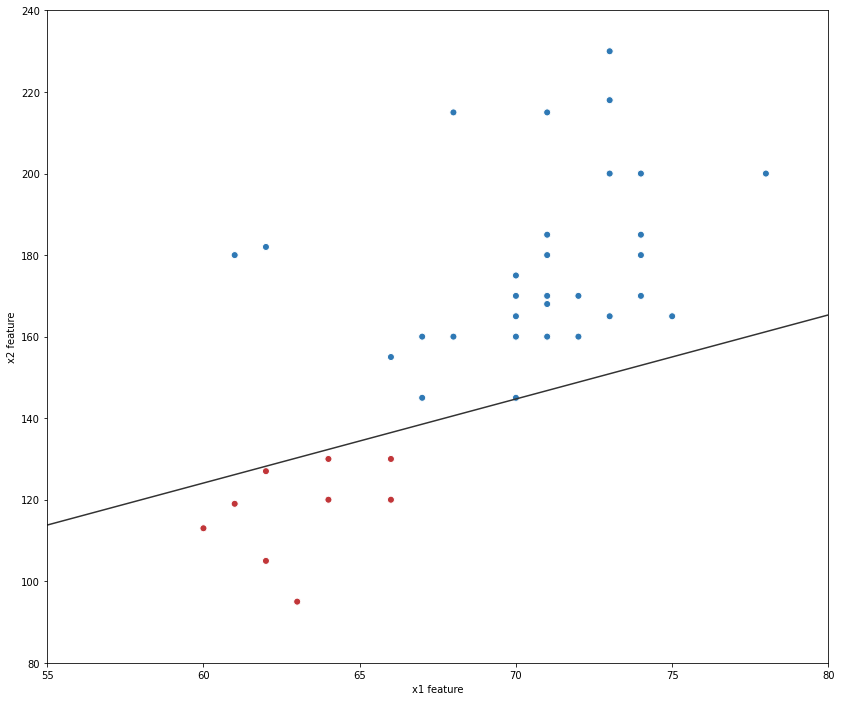

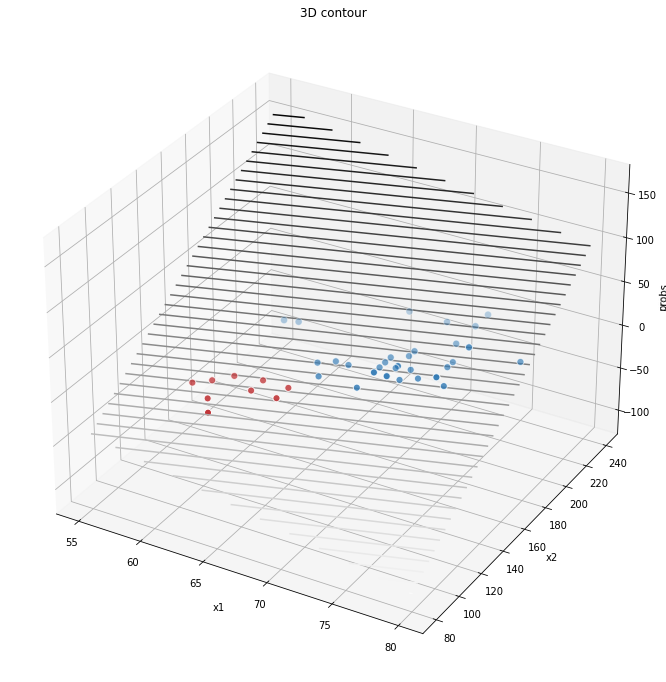

In [98]:
lr = LogisticRegression(learningRate = 0.0001, maxIteration = 50000, tolerance = 0.0005, removeIndex = [1, 39])
lr.fit()

Because they appear to be anomalies, removing data points 1 and 39 has a greater impact on predicted probability. In order to prevent misclassification and enhance the model those points should be removed.